# AI Fall 2022 - A4 - Decision Tree
## Your info

**Student Name:** Mehdi Lotfian

**Student Id:** 99105689

## Practical Question - Decision Tree (25 + 5 points)
In this question you will first write a program to find an appropriate order of features for training a decision tree based on information gain. In the second part, you will use existing implementations to train and tune a classifier using GridSearch on the given dataset. And try to finish this in <15 mins.

### Import
Import the libraries you need in the next cell.

In [7]:
import pandas as pd
import math
import numpy as np
import sklearn 
import sklearn.model_selection as skm
import sklearn.tree as skt
import sklearn.metrics as skmet
import matplotlib.pyplot as plt

### Part A (20 points)
Consider the following dataframe and answer the following questions:

In [8]:
df = pd.DataFrame({
    'Race': [1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    'Sex': [1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0],
    'Age': [43.0, 72.0, 4.0, 59.0, 34.0, 55.0, 41.0, 39.0, 6.0, 77.0, 67.0, 35.0, 45.0, 39.0, 32.0, 57.0, 99.0, 68.0, 47.0, 28.0],
    'BMI': [25.803, 33.394, 20.278, 32.918, 30.743, 37.734, 23.725, 20.722, 19.452, 22.044, 17.481, 18.918, 28.578, 19.214, 23.562, 23.446, 21.872, 20.691, 25.471, 25.82],
    'Smoker': [1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
    'Label': [False, True, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, True, False],
})

df.head()

,Race,Sex,Age,BMI,Smoker,Label
0,1.0,1.0,43.0,25.803,1.0,False
1,2.0,2.0,72.0,33.394,0.0,True
2,1.0,2.0,4.0,20.278,1.0,False
3,1.0,2.0,59.0,32.918,0.0,False
4,1.0,2.0,34.0,30.743,1.0,False


#### QA.1 (10 points)
Complete the following function that calculates and returns the list of features based on their information gain.

In [9]:
def feature_order(X_data, y_data):
    '''
    Calculate the best feature order
    for training a decision tree based on
    information gain.
    Input:
        X_data (pd.DataFrame) contains data features
        y_data (pd.Series) contains the labels
    Output:
        order (list[str]): The `X_data` columns in the correct order
    '''
    dataset = pd.concat([X_data, y_data], axis=1)
    true_dataset = dataset[dataset["Label"] == True]
    false_dataset = dataset[dataset["Label"] == False]
    p_y_true = len(true_dataset) / len(y_data)
    p_y_false = 1 - p_y_true
    y_entropy = -(p_y_true * np.log(p_y_true) + p_y_false * np.log(p_y_false))
    information_gains = []
    for feature in X_data.columns:
        feature_data = X_data[feature]
        feature_count = dict(dataset[feature].value_counts())
        feature_true_count = dict(true_dataset[feature].value_counts())
        feature_false_count = dict(false_dataset[feature].value_counts())
        feature_entropy = 0
        for key in feature_count.keys():
            true_feature = 0
            if feature_true_count.get(key) is not None:
                true_feature = feature_true_count[key] / feature_count[key]
            if true_feature != 1 and true_feature != 0:
                feature_entropy -= (feature_count[key] / len(y_data)) *\
                                   ((true_feature * np.log(true_feature)) +
                                    ((1 - true_feature) * np.log(1 - true_feature)))
        information_gains.append((y_entropy - feature_entropy, feature))
    information_gains.sort(reverse=True)
    return list(map(lambda x: x[1], information_gains))

print(feature_order(df.drop(['Label'], axis=1), df['Label']))

['BMI', 'Age', 'Race', 'Smoker', 'Sex']


#### QA.2 (5 points)
What are some of the effective approaches to prevent the tree from overfitting? (three approaches)

<font color=#183364>
    <i>
        Answer.
        <ol>
            <li>Pre-Pruning: concider a limit for tree depth or its leaf nodes so the tree can't fully grow which will increase the bias and prevent overfitting.</li>
            <li>Post-Pruning: make the tree completly. Then prun some nodes and branches to increase the bias and prevent overfitting.</li>
            <li>Random Forest (FS): make multiple decision trees with different approaches and pick the best one to prevent overfitting.</li>
        </ol>
    </i>
</font>

#### QA.3 (5 points)
About the `Age` feature which is an integer-valued input attribute, how can a tree utilize it for classification? Write a small piece of code to find the answer for this specific column.

<font color=#183364>
    <i>
        We wrote a piece of code to calculate the information gain of age feature, using different thresholds and pick the best threshold that maximizes the information gain. In the end we printed the best threshold and it's information gain which is more than BMI IG and now age is the best first choise for making and tree. In the last part we can see the new dataset using the best threshold.
    </i>
</font>

In [10]:
# Your code here
ages = list(df['Age'])
max_information_gain = 0
max_information_gained_df = df
best_threshold = 0
for threshold in ages:
  new_df = df.copy()
  new_df['Age'] = new_df['Age'] // threshold

  X_data, y_data = new_df.drop(['Label'], axis=1), new_df['Label']
  dataset = pd.concat([X_data, y_data], axis=1)
  true_dataset = dataset[dataset["Label"] == True]
  false_dataset = dataset[dataset["Label"] == False]
  p_y_true = len(true_dataset) / len(y_data)
  p_y_false = 1 - p_y_true
  y_entropy = -(p_y_true * np.log2(p_y_true) + p_y_false * np.log2(p_y_false))
  feature_count = dict(dataset['Age'].value_counts())
  feature_true_count = dict(true_dataset['Age'].value_counts())
  feature_false_count = dict(false_dataset['Age'].value_counts())
  feature_entropy = 0
  for key in feature_count.keys():
      true_feature = 0
      if feature_true_count.get(key) is not None:
        true_feature = feature_true_count[key] / feature_count[key]
      if true_feature != 1 and true_feature != 0:
        feature_entropy -= (feature_count[key] / len(y_data)) *\
        ((true_feature * np.log2(true_feature)) +
         ((1 - true_feature) * np.log2(1 - true_feature)))
  information_gain = y_entropy - feature_entropy
  if information_gain > max_information_gain:
    max_information_gain = information_gain
    max_information_gained_df = new_df
    best_threshold = threshold

print('best threshold: ' + str(best_threshold))
print('max information gain: ' + str(max_information_gain))
max_information_gained_df

best threshold: 4.0
max information gain: 0.6219280948873623


,Race,Sex,Age,BMI,Smoker,Label
0,1.0,1.0,10.0,25.803,1.0,False
1,2.0,2.0,18.0,33.394,0.0,True
2,1.0,2.0,1.0,20.278,1.0,False
3,1.0,2.0,14.0,32.918,0.0,False
4,1.0,2.0,8.0,30.743,1.0,False
5,1.0,2.0,13.0,37.734,1.0,True
6,1.0,2.0,10.0,23.725,0.0,False
7,1.0,2.0,9.0,20.722,1.0,False
8,1.0,1.0,1.0,19.452,0.0,False
9,1.0,1.0,19.0,22.044,1.0,False


### Part B (10 points)
In this part you will learn more about [sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and use it to train a classifier and tune its parameters.

#### QB.1 (5 points)
For measuring the _accuracy_ of your models, choose a subset of the given dataset as your validation set (Check out [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)).

In [11]:
# Your code here
## Split the dataset
X, y = df.drop(['Label'], axis=1), df['Label']
X_train, X_test, y_train, y_test = skm.train_test_split(X,y , random_state=104,test_size=0.25, shuffle=True)

In [12]:
# Your code here
## Set your own hyperparameters below, such as:
dt_hyperparams = {
    'min_samples_split': 2,
    'criterion': 'entropy',
    # ...
    'max_depth': None,
    'splitter': 'best',
    'min_samples_leaf': 1,
    'max_features': None
}

## Train the model and check its performance
decision_tree = skt.DecisionTreeClassifier(**dt_hyperparams).fit(X_train, y_train)
print('accuracy: ' + str(skmet.accuracy_score(y_test, decision_tree.predict(X_test))))

accuracy: 0.8


#### QB.2 (5 points)
Take a look at customizable and potentially useful input params of the model, define a range for each of their values, and use GridSearch (Feel free to implement/[import](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) it) and find a set of hyperparametetrs that work best among your candidates.

In [18]:
# Your code here
params = {
    'criterion':  ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [i for i in range(3, 6)],
    'min_samples_split': [i for i in range(2, 10, 2)],
    'min_samples_leaf': [i for i in range(1, 10, 2)],
    'max_features': [None, 'auto', 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'max_leaf_nodes': [i for i in range(2, 20, 2)],
}

best_decision_tree = skt.DecisionTreeClassifier()
grid_search = skm.GridSearchCV(best_decision_tree, params, scoring='accuracy').fit(X_train, y_train)
print('accuracy: ' + str(grid_search.score(X_test, y_test)))
print('best params: ' + str(grid_search.best_params_))

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


accuracy: 0.6
best params: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'max_leaf_nodes': 12, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'random'}


#### QB.3 (5 extra points)
Visualize the tree splits and interpret it (Hint: Search about `IPython.display.Image`, `pydotplus`, `StringIO`, and `export_graphviz`).

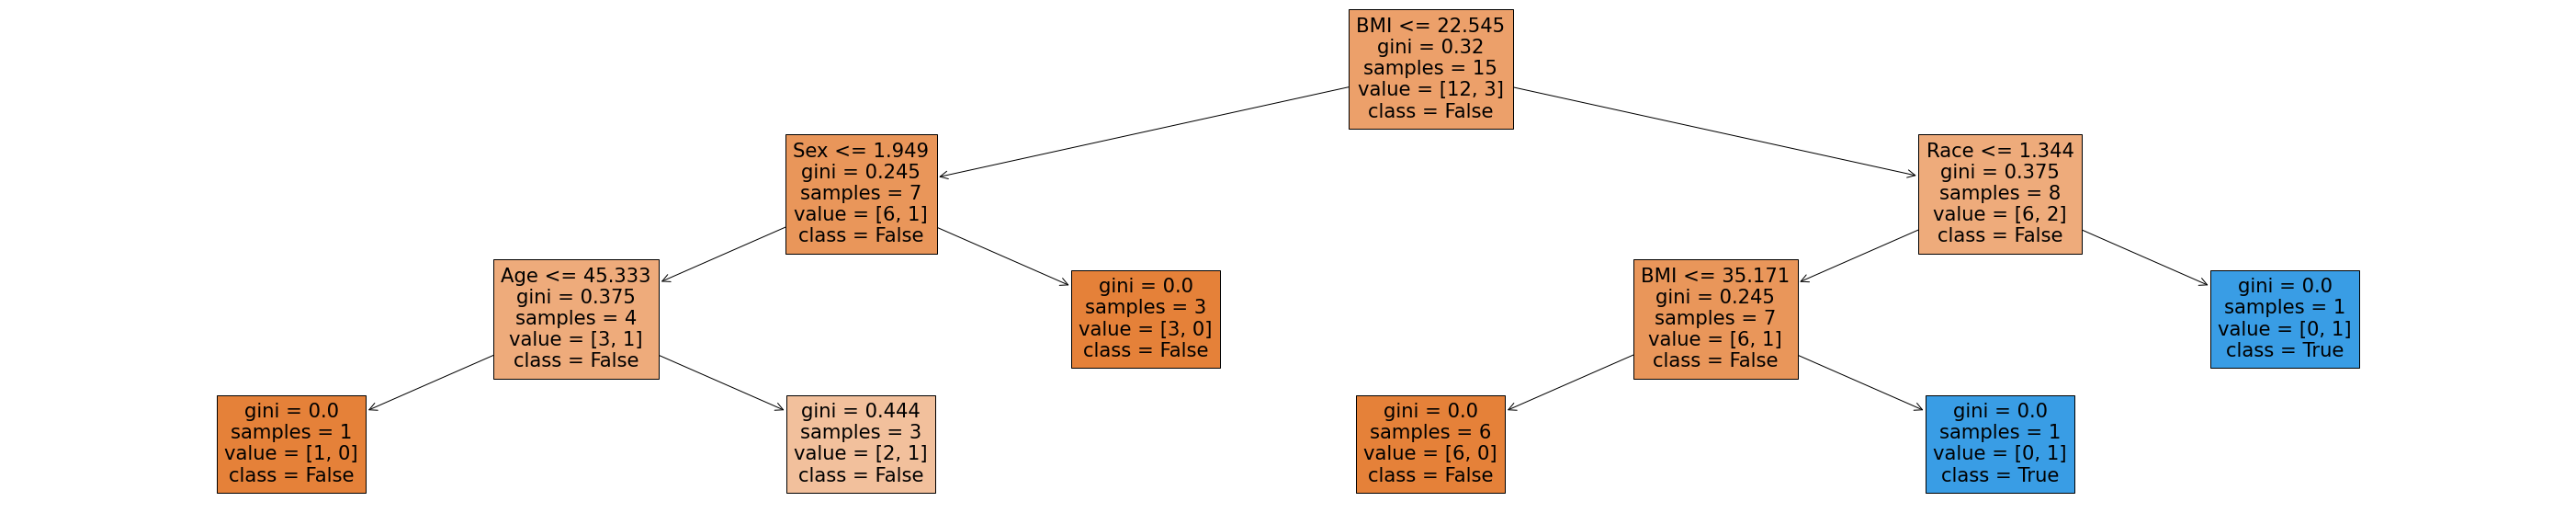

In [19]:
plt.figure(figsize =(50,10))
best_decision_tree = skt.DecisionTreeClassifier(**grid_search.best_params_).fit(X_train, y_train)
skt.plot_tree(best_decision_tree, feature_names = X_train.columns, class_names=list(map(str, np.unique(y_train))), filled=True);

<font color=48f50d>
According to the tree made by max_depth = 3, if a person has a BMI greater than 22.545 and race equal to 2 or BMI greater than 35, the lable is predicted true, otherwise its predicted false.
</font>